In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Quantum_Kernel import *

%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit , transpile, Aer ,IBMQ
from qiskit.visualization import *
from qiskit.tools.jupyter import *
from qiskit.providers.ibmq import least_busy
from qiskit.providers.aer import QasmSimulator

from qiskit import Aer, QuantumCircuit
from qiskit.opflow import Z, I, StateFn
from qiskit.utils import QuantumInstance
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit.algorithms.optimizers import *

from qiskit.opflow import StateFn, PauliSumOp, AerPauliExpectation, ListOp, Gradient
from qiskit_machine_learning.neural_networks import OpflowQNN
import qiskit.quantum_info as qi
from scipy import optimize
from qiskit.opflow.gradients import Gradient
from typing import Union

from IPython.display import clear_output
from scipy.optimize import approx_fprime


# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [5]:
mat = pd.read_csv("malaria\Mat_train.csv")

In [6]:
mat_x = mat.iloc[:,1:]
mat_y = mat.iloc[:,0:1]

In [7]:
mat_xs = np.pi*(mat_x-np.min(mat_x))/(np.max(mat_x)-np.min(mat_x))
mat_ys = np.pi*(mat_y-np.min(mat_y))/(np.max(mat_y)-np.min(mat_y))

In [8]:
mat_x

,vegetation,water,rain,x1,x2,x3,x4,x5,x6,x7,...,x230,x231,x232,x233,x234,x235,x236,x237,x238,x239
0,-0.630022,-0.408734,-1.181258,518.288114,516.131378,526.663793,389.888883,387.814227,397.949275,358.735868,...,643.968071,602.771985,574.781793,559.763559,557.584530,1505.303432,1358.585269,1227.914103,1112.904084,857.928251
1,-0.720276,-0.804297,0.396576,721.605987,767.077595,826.361951,570.774960,614.916849,672.588022,388.003650,...,421.803781,426.979751,444.561851,474.749176,517.857387,887.460400,798.548165,724.121922,663.758137,563.375079
2,-0.201062,2.803119,0.834390,1291.058632,1390.487211,1505.288112,1095.611910,1193.133977,1305.902450,721.467504,...,293.900222,340.677648,400.595716,474.287016,562.366285,398.728387,361.613465,336.946841,324.391011,358.409944
3,0.159907,0.470622,0.331857,2709.487059,2727.472131,2761.040264,2376.020316,2393.739566,2426.816374,2104.587896,...,13.337771,2.355428,-0.170820,-0.060039,4.746701,463.470392,354.919143,262.373866,185.307685,40.295648
4,1.405908,-0.738166,1.106541,1386.738654,1427.936322,1483.758201,1161.688087,1202.019697,1256.708933,923.428683,...,111.423191,110.021816,118.784956,138.066308,168.527576,524.574727,435.005529,359.937094,298.722329,191.336800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,-1.667931,0.307437,-1.977657,49.789170,60.189900,80.418326,20.409368,29.398388,47.572834,21.965937,...,1711.810551,1684.650540,1672.231760,1674.515756,1691.509634,2613.165991,2476.682988,2356.343459,2251.915438,2032.041201
3496,-0.331652,-0.587832,-0.720589,253.174445,238.368831,235.008625,172.004510,158.051710,154.893332,214.531676,...,1138.472215,1078.403904,1032.597254,1000.837735,982.967875,2209.151602,2038.430094,1884.254564,1746.309413,1426.716895
3497,-0.412277,-0.454341,-0.418252,216.185622,202.980242,200.948823,142.465927,130.096997,128.199704,185.638124,...,1213.408476,1154.439336,1109.813588,1079.335050,1062.862652,2285.624036,2115.908406,1962.726095,1825.770357,1509.237715
3498,-1.054157,4.376763,-1.063629,492.132543,585.629402,694.312944,405.744502,497.030522,603.563898,154.449276,...,1132.583230,1193.576669,1269.163138,1359.630695,1465.291839,1315.481483,1277.507022,1253.856682,1244.434655,1301.441578


In [9]:
sample = 30

sto_ind = np.random.randint(0,len(mat_xs),sample)

In [10]:
sto_ind

array([ 294, 2252, 1212, 2911, 2872, 2791,  848, 3447,  168, 3247, 3160,
        709, 3021,  714, 2461, 2325, 1488, 2268, 2136, 2892,  902, 1730,
        413, 2112, 2721,   64, 2137, 1101, 2117,  449])

In [18]:
sto_ind = np.array([1850,  609, 1026, 1222, 1018, 1559, 1852, 2809, 2887, 3444, 2783,
       2222, 1796, 2027,  498, 1846, 1561, 1096,  310, 1524, 1386, 1343,
       1318, 2824,   44, 3380, 1009, 1111,  595,  805])

In [19]:
data_sto = mat_xs.iloc[sto_ind,:]
data_sto_y = mat_ys.iloc[sto_ind]
n = len(data_sto)

In [38]:
start_time = time.time()
gram_matrix_gaussian = Gram_gaussian(data_sto,3)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.013834238052368164 seconds ---


<ipython-input-37-d38519f7cba9>:33: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  U = np.matmul(data,data.T)


In [39]:
pd.DataFrame(gram_matrix1).to_csv("gram_malaria_gaussian.csv")

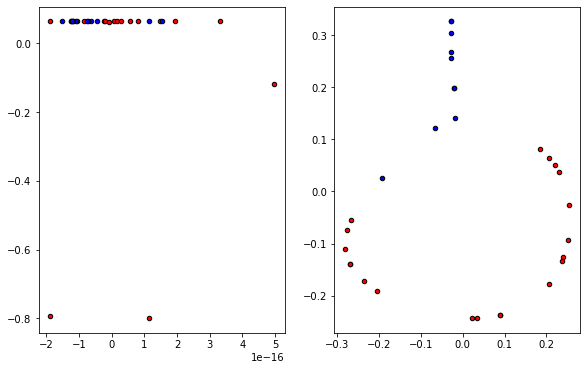

In [145]:
plt.figure(figsize=(15,6))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
comp = 0.1


red = (data_sto_y<0.7).values.tolist()
blue = (data_sto_y>0.7).values.tolist() 

kpca_result = KPCA(gram_matrix_gaussian,comp)
kpca_result = pd.DataFrame(kpca_result[0])
ax1.scatter(kpca_result.iloc[red, 0], kpca_result.iloc[red , 1], c="red",s=20, edgecolor='k')
ax1.scatter(kpca_result.iloc[blue, 0], kpca_result.iloc[blue, 1], c="blue",s=20, edgecolor='k')

J = np.outer(np.ones(shape=(n,1)),np.ones(shape=(n,1)))
Q = np.identity(n)-J/n
gram_xh = np.matmul(Q,gram_matrix_gaussian,Q)
gram_y = Gram_gaussian(data_sto_y.values,10)
sir_result = GSIR(gram_y,gram_xh,comp)
sir_result = pd.DataFrame(sir_result[0])
ax2.scatter(sir_result.iloc[red , 0], sir_result.iloc[red , 1], c="red",s=20, edgecolor='k')
ax2.scatter(sir_result.iloc[blue, 0], sir_result.iloc[blue, 1], c="blue",s=20, edgecolor='k')


In [41]:
start_time = time.time()
gram_matrix_G = get_gram_multi(data_sto,kernel_G,shots=100)
print("--- %s seconds ---" % (time.time() - start_time))

  0%|          | 0/100 [00:00<?, ?it/s]

--- 32945.38693380356 seconds ---


In [42]:
pd.DataFrame(gram_matrix_G).to_csv("gram_malaria_G.csv")

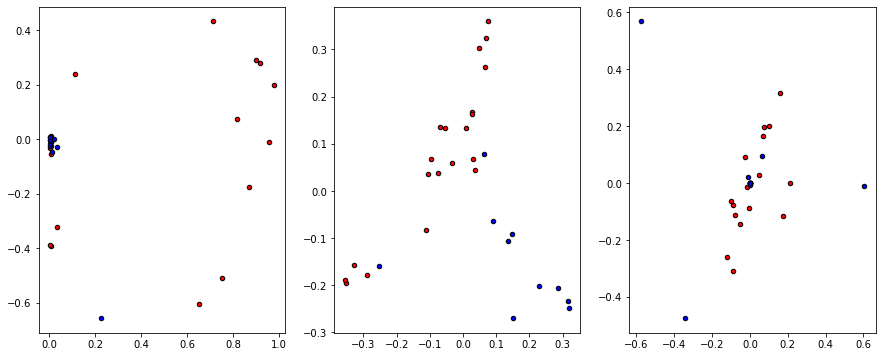

In [101]:
plt.figure(figsize=(15,6))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)


red = (data_sto_y<0.7).values.tolist()
blue = (data_sto_y>0.7).values.tolist() 

kpca_result = KPCA(gram_matrix_G,comp)
kpca_result = pd.DataFrame(kpca_result[0])
ax1.scatter(kpca_result.iloc[red, 0], kpca_result.iloc[red , 1], c="red",s=20, edgecolor='k')
ax1.scatter(kpca_result.iloc[blue, 0], kpca_result.iloc[blue, 1], c="blue",s=20, edgecolor='k')

J = np.outer(np.ones(shape=(n,1)),np.ones(shape=(n,1)))
Q = np.identity(n)-J/n
gram_xh = np.matmul(Q,gram_matrix_G,Q)
gram_y = Gram_gaussian(data_sto_y.values,10)
sir_result = GSIR(gram_y,gram_xh,comp)
sir_result = pd.DataFrame(sir_result[0])
ax2.scatter(sir_result.iloc[red , 0], sir_result.iloc[red , 1], c="red",s=20, edgecolor='k')
ax2.scatter(sir_result.iloc[blue, 0], sir_result.iloc[blue, 1], c="blue",s=20, edgecolor='k')

gram_xl = np.concatenate([np.ones((1,n)),gram_matrix_G])
gram_y = Gram_discrete(data_sto_y.values,version="L")
sir_result = GSAVE(gram_y,gram_xl)
sir_result = pd.DataFrame(sir_result[0])
ax3.scatter(sir_result.iloc[red , 0], sir_result.iloc[red , 1], c="red",s=20, edgecolor='k')
ax3.scatter(sir_result.iloc[blue, 0], sir_result.iloc[blue, 1], c="blue",s=20, edgecolor='k')


In [64]:
start_time = time.time()
gram_matrix_H = get_gram_multi(data_sto,kernel_H,shots=100)
print("--- %s seconds ---" % (time.time() - start_time))

  0%|          | 0/100 [00:00<?, ?it/s]

--- 35815.76322841644 seconds ---


In [65]:
pd.DataFrame(gram_matrix_H).to_csv("gram_malaria_H.csv")

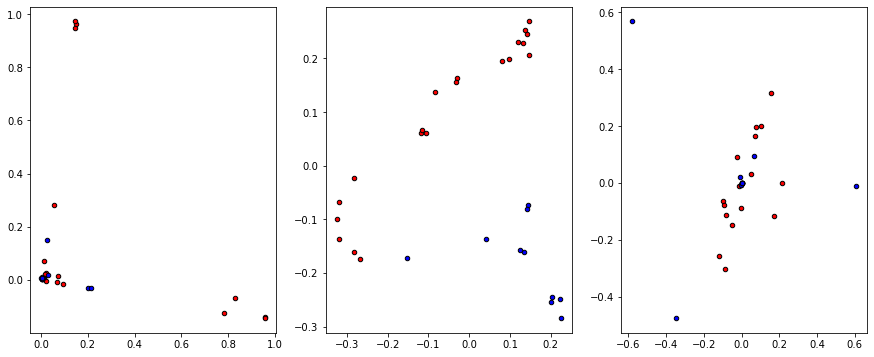

In [102]:
plt.figure(figsize=(15,6))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
ax3 = plt.subplot(133)


red = (data_sto_y<0.7).values.tolist()
blue = (data_sto_y>0.7).values.tolist() 

kpca_result = KPCA(gram_matrix_H,comp)
kpca_result = pd.DataFrame(kpca_result[0])
ax1.scatter(kpca_result.iloc[red, 0], kpca_result.iloc[red , 1], c="red",s=20, edgecolor='k')
ax1.scatter(kpca_result.iloc[blue, 0], kpca_result.iloc[blue, 1], c="blue",s=20, edgecolor='k')

J = np.outer(np.ones(shape=(n,1)),np.ones(shape=(n,1)))
Q = np.identity(n)-J/n
gram_xh = np.matmul(Q,gram_matrix_H,Q)
gram_y = Gram_gaussian(data_sto_y.values,10)
sir_result = GSIR(gram_y,gram_xh,comp)
sir_result = pd.DataFrame(sir_result[0])
ax2.scatter(sir_result.iloc[red , 0], sir_result.iloc[red , 1], c="red",s=20, edgecolor='k')
ax2.scatter(sir_result.iloc[blue, 0], sir_result.iloc[blue, 1], c="blue",s=20, edgecolor='k')


In [15]:
sto_test_ind = np.random.randint(0,len(mat_xs),20)
sto_test_ind = np.array([3313, 2991,  221, 2411, 2553,  945, 2282, 1189, 1853, 3096, 1193,
       2794,  687, 2074, 1142,  862, 3173, 2597, 1426,  212])
data_sto_test =  mat_xs.iloc[sto_test_ind,:]
data_y_test = mat_ys.iloc[sto_test_ind]
n = len(data_sto_test)

In [73]:
gram_test_G = get_gram_multi_test(data_sto,data_sto_test,kernel_G,100)
gram_test_H = get_gram_multi_test(data_sto,data_sto_test,kernel_H,100)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [74]:
pd.DataFrame(gram_test_G).to_csv("gram_malaria_test_G.csv")
pd.DataFrame(gram_test_H).to_csv("gram_malaria_test_H.csv")

In [13]:
gram_malaria0 = pd.read_csv("gram_malaria_gaussian.csv").iloc[:,1:]
gram_malaria1 = pd.read_csv("gram_malaria_G.csv").iloc[:,1:]
gram_malaria2 = pd.read_csv("gram_malaria_H.csv").iloc[:,1:]

<ipython-input-20-6abe7e0d0468>:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,3,1)
<ipython-input-20-6abe7e0d0468>:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,3,4)


Text(0, 0.5, 'GSIR')

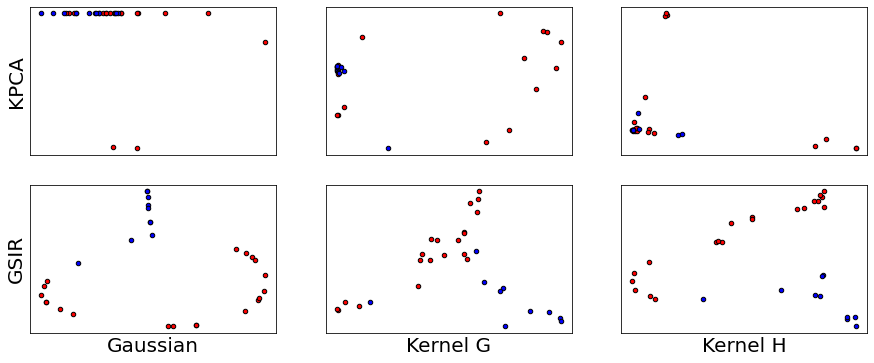

In [20]:
plt.figure(figsize=(15,6))
gram_name = ["Gaussian","Kernel G","Kernel H"]
red = (data_sto_y<0.7).values.tolist()
blue = (data_sto_y>0.7).values.tolist() 


comp = 0.1

for i in range(3):
    comp = 0.001
    G = eval("gram_malaria"+str(i)).values
    kpca_result = KPCA(G,comp)
    kpca_result = pd.DataFrame(kpca_result[0])
    plt.subplot(2,3,i+1)
    plt.scatter(kpca_result.iloc[red, 0], kpca_result.iloc[red , 1], c="red",s=20, edgecolor='k')
    plt.scatter(kpca_result.iloc[blue, 0], kpca_result.iloc[blue, 1], c="blue",s=20, edgecolor='k')
    plt.xticks([], [])
    plt.yticks([], [])
    
    comp = 0.1
    J = np.outer(np.ones(shape=(n,1)),np.ones(shape=(n,1)))
    Q = np.identity(n)-J/n
    gram_xh = np.matmul(Q,G,Q)
    gram_y = Gram_gaussian(data_sto_y.values,10)
    sir_result = GSIR(gram_y,gram_xh,comp)
    sir_result = pd.DataFrame(sir_result[0])
    plt.subplot(2,3,i+4)
    plt.scatter(sir_result.iloc[red , 0], sir_result.iloc[red , 1], c="red",s=20, edgecolor='k')
    plt.scatter(sir_result.iloc[blue, 0], sir_result.iloc[blue, 1], c="blue",s=20, edgecolor='k')
    plt.xticks([], [])
    plt.yticks([], [])
    plt.xlabel(gram_name[i], fontsize=20)
    
plt.subplot(2,3,1)
plt.ylabel("KPCA", fontsize=20)
plt.subplot(2,3,4)
plt.ylabel("GSIR", fontsize=20)

In [186]:
area = (data_sto_y-np.min(data_sto_y))/(np.max(data_sto_y)-np.min(data_sto_y))
area = area.values

<ipython-input-23-2d9b5fcb7766>:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,3,1)
<ipython-input-23-2d9b5fcb7766>:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,3,4)


Text(0, 0.5, 'GSIR')

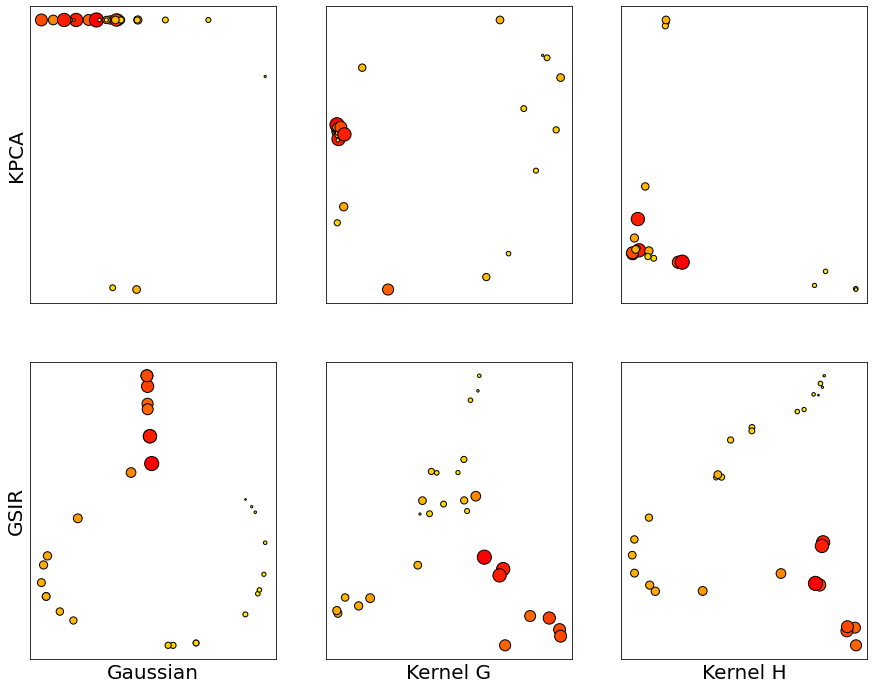

In [23]:
plt.figure(figsize=(15,12))
gram_name = ["Gaussian","Kernel G","Kernel H"]
scale = 200
area = ((data_sto_y-np.min(data_sto_y))/(np.max(data_sto_y)-np.min(data_sto_y))).values*scale
cmap = "autumn"

for i in range(3):
    comp = 0.001
    G = eval("gram_malaria"+str(i)).values
    kpca_result = KPCA(G,comp)
    kpca_result = pd.DataFrame(kpca_result[0])
    plt.subplot(2,3,i+1)
    plt.scatter(kpca_result.iloc[:, 0], kpca_result.iloc[: , 1],edgecolor='k',s=area,c=scale-area,cmap= cmap)
    plt.xticks([], [])
    plt.yticks([], [])
    
    comp = 0.1
    J = np.outer(np.ones(shape=(n,1)),np.ones(shape=(n,1)))
    Q = np.identity(n)-J/n
    gram_xh = np.matmul(Q,G,Q)
    gram_y = Gram_gaussian(data_sto_y.values,10)
    sir_result = GSIR(gram_y,gram_xh,comp)
    sir_result = pd.DataFrame(sir_result[0])
    plt.subplot(2,3,i+4)
    plt.scatter(sir_result.iloc[:, 0], sir_result.iloc[:, 1], edgecolor='k',s=area,c=scale-area,cmap= cmap)
    plt.xticks([], [])
    plt.yticks([], [])
    plt.xlabel(gram_name[i], fontsize=20)
    
plt.subplot(2,3,1)
plt.ylabel("KPCA", fontsize=20)
plt.subplot(2,3,4)
plt.ylabel("GSIR", fontsize=20)